In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from helper_functions import *

In [2]:
train = pd.read_csv("../Data/IPUMS/cleaned_ipums_data.csv")

Pick an arbitrary $\delta$ value.

In [3]:
delta = 0.01

Function to calculate the privacy metrics given training and synthetic data, for a given delta value.

In [4]:
sXs_mnl = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/gmm_and_mnl_" + str(i) + ".csv") for i in range(20)]
sXs_cart = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/gmm_and_cart_" + str(i) + ".csv") for i in range(20)]
sXs_mostly = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/mostly_" + str(i) + ".csv") for i in range(20)]

Adjust variable names in the MOSTLY.AI synthetic data.

In [5]:
for i in range(20):
    sXs_mostly[i].columns = ['incwage', 'years_of_educ', 'potential_experience', 'non_white', 'sex']

In [6]:
pms_mnl = privacy_metrics(train_data=train, synthetic_datasets=sXs_mnl, type_of_synthetic="MNL", delta=delta)

C:\Users\cdbale\Google Drive Streaming\My Drive\BYU\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:103: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]


In [7]:
pms_cart = privacy_metrics(train_data=train, synthetic_datasets=sXs_cart, type_of_synthetic="CART", delta=delta)

C:\Users\cdbale\Google Drive Streaming\My Drive\BYU\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:103: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]


In [8]:
pms_mostly = privacy_metrics(train_data=train, synthetic_datasets=sXs_mostly, type_of_synthetic="MOSTLY.AI", delta=delta)

C:\Users\cdbale\Google Drive Streaming\My Drive\BYU\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:103: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]


In [9]:
privacy_results = pd.concat([pms_mnl, pms_cart.iloc[1:,:], pms_mostly.iloc[1:,:]]).reset_index(drop=True)

In [10]:
privacy_results = privacy_results.melt(id_vars=["Type"], value_vars=["IMS", "DCR", "NNDR"], var_name="Metric") 

In [11]:
privacy_results.to_csv("../Results/IPUMS/privacy_metrics.csv", index=False)

***

Examine how IMS diff changes with $\delta$

In [12]:
delta_vals = np.linspace(0.00001, 1.0, 40)

In [13]:
train_ims = ims_apply(train, [train], delta_vals, synthetic_is_train=True)
avg_mnl_ims = ims_apply(train, sXs_mnl, delta_vals)
avg_cart_ims = ims_apply(train, sXs_cart, delta_vals)
avg_mostly_ims = ims_apply(train, sXs_mostly, delta_vals)

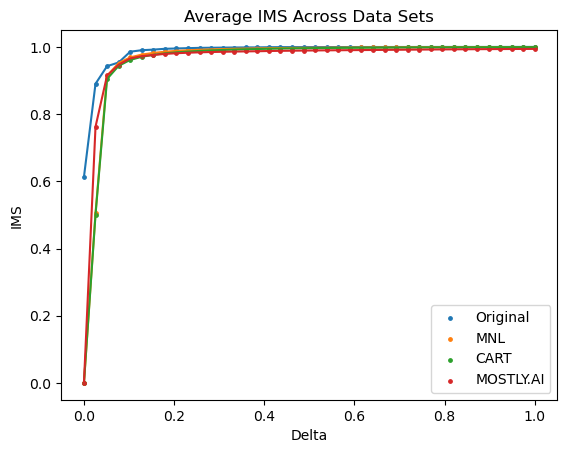

In [14]:
plt.plot(delta_vals, train_ims[0])
plt.scatter(delta_vals, train_ims, s=6, label="Original")

plt.plot(delta_vals, avg_mnl_ims)
plt.scatter(delta_vals, avg_mnl_ims, s=6, label="MNL")

plt.plot(delta_vals, avg_cart_ims)
plt.scatter(delta_vals, avg_cart_ims, s=6, label="CART")

plt.plot(delta_vals, avg_mostly_ims)
plt.scatter(delta_vals, avg_mostly_ims, s=6, label="MOSTLY.AI")

plt.title("Average IMS Across Data Sets")
plt.xlabel("Delta")
plt.ylabel("IMS")

plt.legend()
plt.show()

***